In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
training_data = pd.read_csv("training.csv")

In [100]:
training_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [66]:
f_train_data = training_data.iloc[0]
img_list = f_train_data["Image"].split(' ')
img_array = np.array(img_list, dtype = 'float').reshape(96,96)

In [112]:
training = training_data.drop("Image", axis=1)
df_labels_train = []
for i in range(7049):
    df_labels_train.append(training.iloc[i,:])
labels_train = np.array(df_labels_train, dtype = 'float')
labels_train.shape
labels_train[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

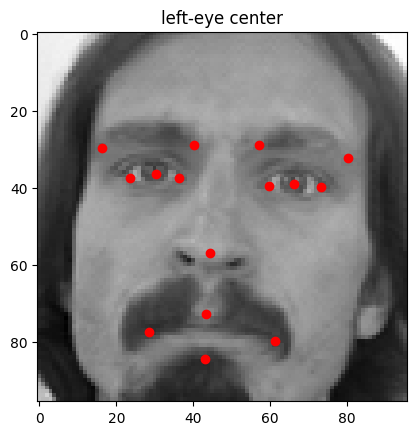

In [115]:
for i in range(0,30,2):
    plt.plot(labels_train[0][i], labels_train[0][i+1], marker = 'o', color = 'red')
plt.imshow(img_array, cmap = 'gray')
plt.title("left-eye center")
plt.show()

In [124]:
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

In [137]:
test_img = pd.read_csv("test.csv")
test_img.shape
test_img.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [131]:
array_img_test = test_img["Image"]
print(array_img_test)

0       182 183 182 182 180 180 176 169 156 137 124 10...
1       76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2       177 176 174 170 169 169 168 166 166 166 161 14...
3       176 174 174 175 174 174 176 176 175 171 165 15...
4       50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
                              ...                        
1778    101 101 101 100 100 97 97 98 102 149 214 206 1...
1779    201 191 171 158 145 140 136 130 123 115 108 10...
1780    28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781    104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...
1782    63 61 64 66 66 64 65 70 69 70 77 83 63 34 22 2...
Name: Image, Length: 1783, dtype: object
